In [1]:
from utils.data import *
from time import time
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, BatchNormalization, Convolution2D, DepthwiseConv2D, AveragePooling2D

Using TensorFlow backend.


In [2]:
t1 = time()
data, labels, label_to_breed, breed_to_label = load_data(width = 224, height = 224)
print('Time to load the data: %ss' % int(time()-t1))

./data/dog_images.tar already exists. Begin extracting...
Standford dogs data were extracted. Begin creating dataset...
Dataset, labels and dictionaries are loaded
Time to load the data: 160s


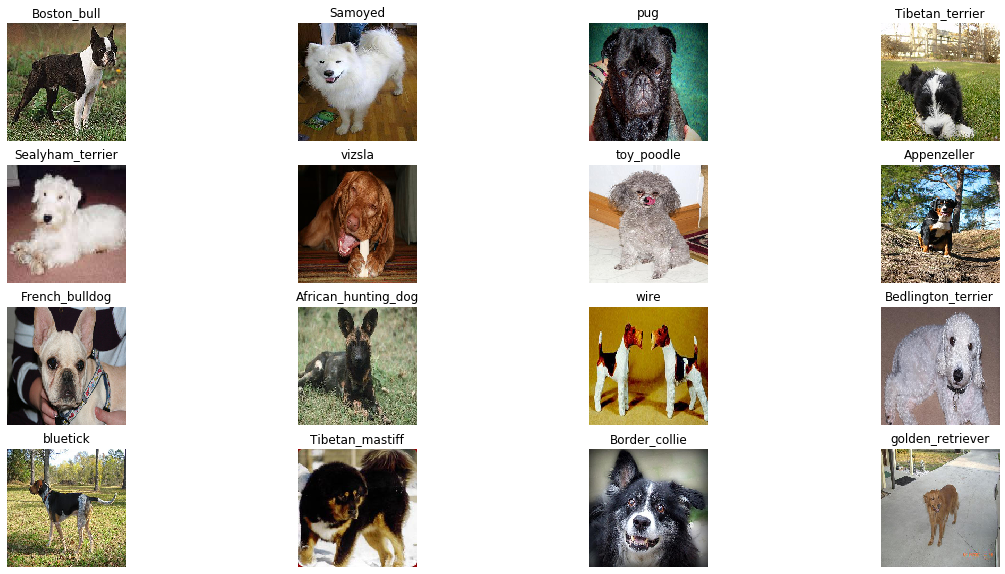

In [3]:
# Visualization of the original data
fig = plt.figure(figsize=(20,10))
mask=np.random.choice(len(data),16, replace = False)
for i in range(16):
    ax = fig.add_subplot(4,4,i+1)
    ax.imshow(data[mask[i]])
    ax.axis('off')
    ax.title.set_text(label_to_breed[labels[mask[i]]])

In [4]:
shuffle = np.random.choice(data.shape[0], 1000, replace = False)

In [7]:
x = data[shuffle,:,:,:]
y = to_categorical(labels[shuffle,])
x.shape, y.shape

((1000, 224, 224, 3), (1000, 120))

In [8]:
num_train = int(0.95*x.shape[0])
num_test = x.shape[0]-num_train
x_train = x[:num_train,:,:,:]
y_train = y[:num_train,]
x_test = x[num_train:,:,:,:]
y_test = y[num_train:,:]

x_train = x_train/255
x_test = x_test/255

In [9]:
np.random.seed(123)  # for reproducibility 

model = Sequential()

model.add(Convolution2D(32, (3, 3), strides=2, padding='same', activation='relu', input_shape=x_train.shape[1:]))
model.add(BatchNormalization())
model.add(DepthwiseConv2D(kernel_size = (3, 3), padding='same', depth_multiplier=1, strides=(1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(64, (1, 1), padding='same', strides=1, activation='relu'))
model.add(BatchNormalization())
model.add(DepthwiseConv2D(kernel_size = (3, 3), padding='same', depth_multiplier=1, strides=(2,2), activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(128, (1, 1), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(DepthwiseConv2D(kernel_size = (3, 3), padding='same', depth_multiplier=1, strides=(1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(128, (1, 1), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(DepthwiseConv2D(kernel_size = (3, 3), padding='same', depth_multiplier=1, strides=(2,2), activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(256, (1, 1), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(DepthwiseConv2D(kernel_size = (3, 3), padding='same', depth_multiplier=1, strides=(1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(256, (1, 1), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(DepthwiseConv2D(kernel_size = (3, 3), padding='same', depth_multiplier=1, strides=(2,2), activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(512, (1, 1), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(DepthwiseConv2D(kernel_size = (3, 3), padding='same', depth_multiplier=1, strides=(1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(512, (1, 1), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(DepthwiseConv2D(kernel_size = (3, 3), padding='same', depth_multiplier=1, strides=(1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(512, (1, 1), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(DepthwiseConv2D(kernel_size = (3, 3), padding='same', depth_multiplier=1, strides=(1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(512, (1, 1), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(DepthwiseConv2D(kernel_size = (3, 3), padding='same', depth_multiplier=1, strides=(1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(512, (1, 1), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(DepthwiseConv2D(kernel_size = (3, 3), padding='same', depth_multiplier=1, strides=(1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(512, (1, 1), strides=1, activation='relu'))
model.add(BatchNormalization())
model.add(DepthwiseConv2D(kernel_size = (3, 3), padding='same', depth_multiplier=1, strides=(2,2), activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(1024, (1, 1), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(DepthwiseConv2D(kernel_size = (3, 3), padding='same', depth_multiplier=1, strides=(1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(1024, (1, 1), padding='same', strides=1, activation='relu'))
model.add(BatchNormalization())

model.add(AveragePooling2D(pool_size=(7,7), strides=1))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(120, activation='softmax'))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 112, 112, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 32)      128       
_________________________________________________________________
depthwise_conv2d_1 (Depthwis (None, 112, 112, 32)      320       
_________________________________________________________________
batch_normalization_2 (Batch (None, 112, 112, 32)      128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 64)      2112      
_________________________________________________________________
batch_normalization_3 (Batch (None, 112, 112, 64)      256       
_________________________________________________________________
depthwise_conv2d_2 (Depthwis (None, 56, 56, 64)       

In [11]:
# 8. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [12]:
# 9. Fit model on training data
model.fit(x_train, y_train, 
          batch_size=32, epochs=1, verbose=1)

Epoch 1/1


UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node conv2d_1/convolution (defined at /home/ecbm4040/miniconda3/envs/ecbm4040project/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py:1751) ]] [Op:__inference_keras_scratch_graph_25464]

Function call stack:
keras_scratch_graph


In [13]:
!python --version

OSError: [Errno 12] Cannot allocate memory

In [10]:
# 10. Evaluate model on test data
score = model.evaluate(x_test, y_test, verbose=0)

Epoch 1/1
19550/19550 [==============================] - 2027s 104ms/step - loss: 4.7486 - accuracy: 0.0182


In [11]:
score

[4.560169435451051, 0.03498542308807373]